<a href="https://colab.research.google.com/github/popogeee/100Day_ML/blob/master/Day_085_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Thu Jul 16 14:59:46 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.51.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P0    76W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from keras import datasets
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation

Using TensorFlow backend.


In [3]:
def build_model(X_train):
    model = Sequential()
    model.add(Conv2D(256,kernel_size=(3,3), activation="relu", padding="same", input_shape=X_train.shape[1:]))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(128,kernel_size=(3,3), activation="relu", padding="same"))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(64,kernel_size=(3,3), activation="relu", padding="same"))
    model.add(MaxPooling2D(2,2))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(256, activation="relu"))
    model.add(Dropout(0.25))
    model.add(Dense(256, activation="relu"))
    model.add(Dense(10, activation="softmax"))
    #model.summary()
    
    return model

In [4]:
def plot_loss_acc():
    val_loss = history.history["val_loss"]
    loss = history.history["loss"]
    plt.plot(val_loss, label="val_loss")
    plt.plot(loss, label="loss")
    plt.legend()
    plt.show()
    val_accuracy = history.history["val_accuracy"]
    accuracy = history.history["accuracy"]
    plt.plot(val_accuracy, label="val_accuracy")
    plt.plot(accuracy, label="accuracy")
    plt.legend()
    plt.show()

In [5]:
#取得Keras Dataset
(X_train, y_train), (X_test, y_test) =datasets.cifar10.load_data()
#將像素降為0-1範圍
X_train = (X_train/255).astype("float32")
X_test = (X_test/255).astype("float32")

Train on 35000 samples, validate on 15000 samples
Epoch 1/30
35000/35000 [==============================] - 22s 630us/step - loss: 1.8064 - accuracy: 0.4233 - val_loss: 3.1604 - val_accuracy: 0.0979
Epoch 2/30
35000/35000 [==============================] - 20s 562us/step - loss: 1.4130 - accuracy: 0.5448 - val_loss: 3.8930 - val_accuracy: 0.0979
Epoch 3/30
35000/35000 [==============================] - 20s 561us/step - loss: 1.2711 - accuracy: 0.5927 - val_loss: 4.3109 - val_accuracy: 0.0979
Epoch 4/30
35000/35000 [==============================] - 20s 562us/step - loss: 1.1698 - accuracy: 0.6249 - val_loss: 3.8288 - val_accuracy: 0.1024
Epoch 5/30
35000/35000 [==============================] - 20s 560us/step - loss: 1.1054 - accuracy: 0.6457 - val_loss: 3.5863 - val_accuracy: 0.1047
Epoch 6/30
35000/35000 [==============================] - 20s 561us/step - loss: 1.0539 - accuracy: 0.6601 - val_loss: 2.5719 - val_accuracy: 0.2160
Epoch 7/30
35000/35000 [==============================] 

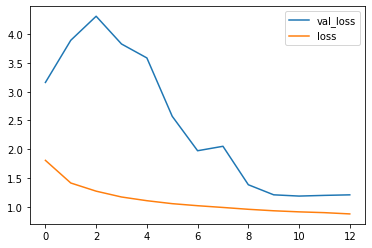

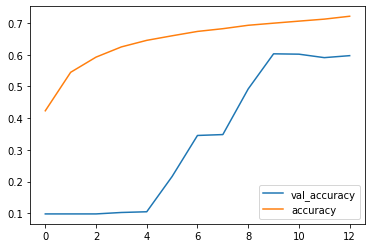

In [6]:
## 超參數設定
#LR = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
# nesterov = [False, True]
# MOMENTUM = [0.75, 1, 1.25]
#optimizers = ["adagrad", "sgd", "rmsprop", "adam"]
#from itertools import product
#drop = [0.125, 0.25, 0.5]
from keras import regularizers
from keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping
val_accuracy_score = []
accuracy_score = []
# 以不同learning rate(LR)進行實驗
#for i,j in product(nesterov, MOMENTUM):
#for optimizer in optimizers:
#L2_exp = [0.01, 0.001, 0.0001]
# batch = [64, 256, 512]
# for k in batch:
    #print(i, j)
    #print(optimizer) 
model = Sequential()
model.add(Conv2D(128,kernel_size=(3,3), padding="same", kernel_regularizer=regularizers.l2(0.001), 
                    input_shape=X_train.shape[1:]))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.5))
model.add(Conv2D(128,kernel_size=(3,3), padding="same", kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())  #BatchNormalization要放在Activation之前
model.add(Activation("relu"))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Dense(10, activation="softmax"))  
#model = build_model(X_train)
#optimizer = keras.optimizers.SGD(lr=0.01, nesterov=i, momentum=j)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
callbacks_list = [ModelCheckpoint(filepath='test.hdf5', save_best_only=True), EarlyStopping(monitor="val_accuracy", patience=3)]
history = model.fit(X_train, y_train, epochs=30, verbose=1, batch_size=512, validation_split=0.3, callbacks=callbacks_list)
test_loss, test_acc = model.evaluate(X_test, y_test)
print("test_loss=", test_loss)
print("test_acc=", test_acc)
# val_accuracy = history.history["val_accuracy"]
# accuracy = history.history["accuracy"]
# val_accuracy_score.append(val_accuracy)
# accuracy_score.append(accuracy)

plot_loss_acc() 

In [7]:
#labels = [(False, 0.75), (False, 1.0), (False, 1.25), (True, 0.75), (True, 1.0), (True, 1.25)]
#labels = ["adagrad", "sgd", "rmsprop", "adam"]
#L2_exp = [0.01, 0.001, 0.0001]
#drop = [0.125, 0.25, 0.5]
# batch = [64, 256, 512]
# plt.figure(figsize=(15,10))
# for i in range(3):
#     plt.plot(val_accuracy_score[i], "-", label=batch[i])
#     plt.plot(accuracy_score[i], "--", label=batch[i])
# plt.legend()
# plt.title("Accuracy")
# plt.show()

In [8]:
# momentum >= 1, 會造成整體accuracy, val_accuracy在震盪後都大幅降低
# nesterov 正負不影響結果

In [9]:
#Adam的表現在預設的參數之下表現最好

In [10]:
#L2值越大，會更不容易overfitting，約L2 = 0.001較好

In [11]:
#Dropout rate 在0.125時，有點overfiting，在0.25的時候train set 與val set的accuracy看起來很不錯，在0.5的時候有underfitting

In [12]:
#batch size越小，收斂速度可能會越快64>256>512，但最後accuracy差異不大